In [ ]:
#Exercise: Building a Machine Learning Model for Data Analysis

In [ ]:
'''
In this exercise i am going to import a dataset in which there are different variable to describe cars. I will use the data to explain the selling price 
of the cars following the following steps:
    1- Upload dataset
    2- Delete variable which can be repeted
    3- Delete the NA of the dataset
    4- Transform and plot the variables
    5- Explain the relationship between the selling price and other variables 
    6- Create test and train sets
    7- Perform a linear regresion model
    8- Prove how good is the model
'''

In [1]:
#import the libraries which will be used
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from urllib.request import urlopen
import html5lib
from bs4 import BeautifulSoup
from sklearn import linear_model
import plotly.express as px

In [2]:
#dowload the dataset
dir = 'Downloads/Car details v3 (1).csv'
car = pd.read_csv(dir, sep = ',')
#change the name of the columns
car.rename(columns={"mileage": "mileage (kmpl)", "engine": "engine (CC)"}, inplace=True)
#delete the measures of the column engine
car["engine (CC)"]=car["engine (CC)"].replace({'CC':''}, regex=True)
#drop the columns torque and max_power
car = car.drop(['torque', 'max_power'], axis = 1)
car #show the dataset


name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner mileage (kmpl)  \
0     Individual       Manual           First Owner      23.4 kmpl   
1     Individual       Manual          Second Owner     21.14 kmpl   
2     Individual       Manual           Third Owner      17.7 kmpl   
3     Individual       Manual           First Owner      23.0 kmpl   
4     Individual       Manual           First Owner      16.1 kmpl   
...          ...          ...                   ...            ...   
8123  Individual       Manual           First Owner      18.5 kmpl   
8124  Individual       Manual  Fourth & Above Owner      16.8 kmpl   
8125  Individual       Manual           First Owner      19.3 kmpl   
8126  Individual       Manual           First Owner     23.57 kmpl   
8127  Individual       Manual           First Owner     23.57 kmpl   

     engine (CC)  seats  
0          1248     5.0  
1          1498     5.0  
2          1497     5.0  
3          1396     5.0  
4          1298     5.0  
...          ...    ...  
8123       1197     5.0  
8124       1493     5.0  
8125       1248     5.0  
8126       1396     5.0  
8127       1396     5.0  

[8128 rows x 11 columns]

In [3]:
len(car.index) # show all the rows

8128

In [4]:
car.isnull().sum() # show the number of NaN of each column

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage (kmpl)    221
engine (CC)       221
seats             221
dtype: int64

In [5]:
''' due to the little number of Na I am going to drop it 
i won't drop duplicates because it may be cars with different owners which are sold'''
car.dropna(how='any',axis=0, inplace=True)
print(car.isnull().sum())# Ensuring that there aren't Na
car#show the dataset now

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage (kmpl)    0
engine (CC)       0
seats             0
dtype: int64


name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner mileage (kmpl)  \
0     Individual       Manual           First Owner      23.4 kmpl   
1     Individual       Manual          Second Owner     21.14 kmpl   
2     Individual       Manual           Third Owner      17.7 kmpl   
3     Individual       Manual           First Owner      23.0 kmpl   
4     Individual       Manual           First Owner      16.1 kmpl   
...          ...          ...                   ...            ...   
8123  Individual       Manual           First Owner      18.5 kmpl   
8124  Individual       Manual  Fourth & Above Owner      16.8 kmpl   
8125  Individual       Manual           First Owner      19.3 kmpl   
8126  Individual       Manual           First Owner     23.57 kmpl   
8127  Individual       Manual           First Owner     23.57 kmpl   

     engine (CC)  seats  
0          1248     5.0  
1          1498     5.0  
2          1497     5.0  
3          1396     5.0  
4          1298     5.0  
...          ...    ...  
8123       1197     5.0  
8124       1493     5.0  
8125       1248     5.0  
8126       1396     5.0  
8127       1396     5.0  

[7907 rows x 11 columns]

In [6]:
# convert km/kg to kmpl in column mileage
Correct_Mileage= []# create empty list
for i in car['mileage (kmpl)']:
    if str(i).endswith('km/kg'): # if final letters are km/kg 
        i = i[:-6] # delete km/kg 
        i = float(i)*1.40 # convert kmpl as float
        Correct_Mileage.append(float(i)) # add to Correct_Mileage as float
    elif str(i).endswith('kmpl'):
        i = i[:-5]# delete kmpl 
        Correct_Mileage.append(float(i))

car['mileage (kmpl)'] = Correct_Mileage # put the Correct Mileage in the column mileage (kpml)



In [7]:
# change the type of the following columns to integer
tipo=['selling_price', 'engine (CC)', 'seats', 'km_driven']# select the columns
car[tipo]=car[tipo].astype('int64')#change the type

car#show the dataset

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage (kmpl)  \
0     Individual       Manual           First Owner           23.40   
1     Individual       Manual          Second Owner           21.14   
2     Individual       Manual           Third Owner           17.70   
3     Individual       Manual           First Owner           23.00   
4     Individual       Manual           First Owner           16.10   
...          ...          ...                   ...             ...   
8123  Individual       Manual           First Owner           18.50   
8124  Individual       Manual  Fourth & Above Owner           16.80   
8125  Individual       Manual           First Owner           19.30   
8126  Individual       Manual           First Owner           23.57   
8127  Individual       Manual           First Owner           23.57   

      engine (CC)  seats  
0            1248      5  
1            1498      5  
2            1497      5  
3            1396      5  
4            1298      5  
...           ...    ...  
8123         1197      5  
8124         1493      5  
8125         1248      5  
8126         1396      5  
8127         1396      5  

[7907 rows x 11 columns]

In [8]:
print(car.head()) # print the first rows of the data

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage (kmpl)  engine (CC)  seats  
0  Individual       Manual   First Owner           23.40         1248      5  
1  Individual       Manual  Second Owner           21.14         1498      5  
2  Individual       Manual   Third Owner           17.70         1497      5  
3  Individual       Manual   First Owner           23.00         1396      5  
4  Individual       Manual   First Owner           16.10         1298      5  


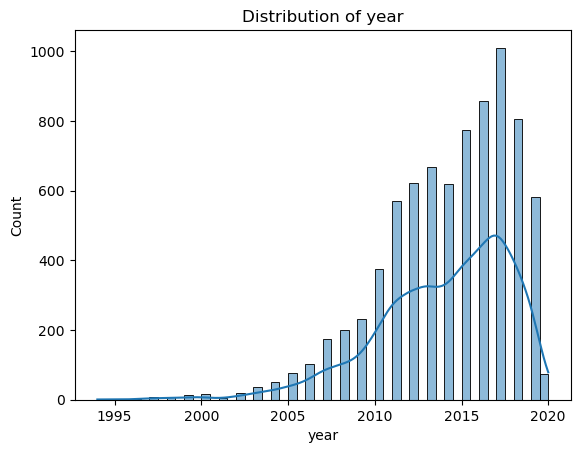

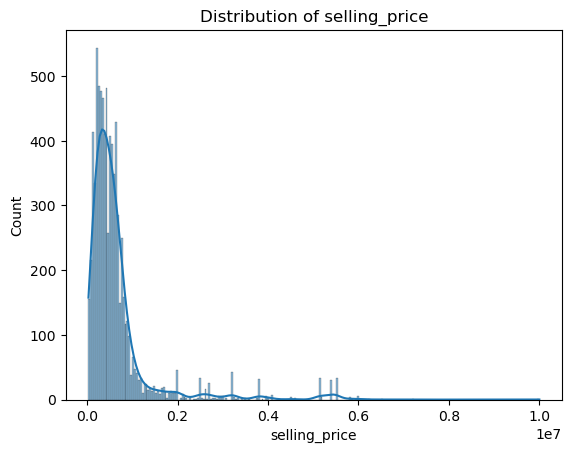

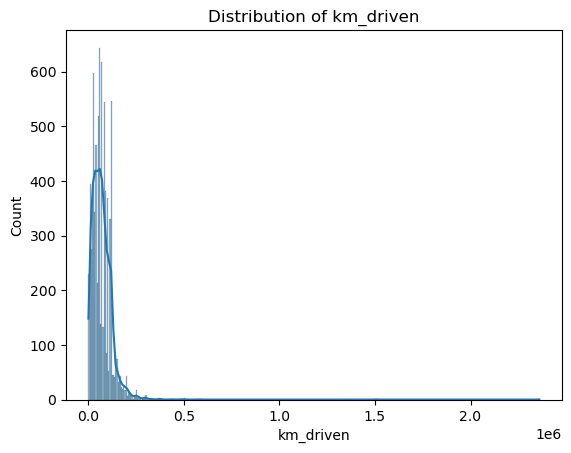

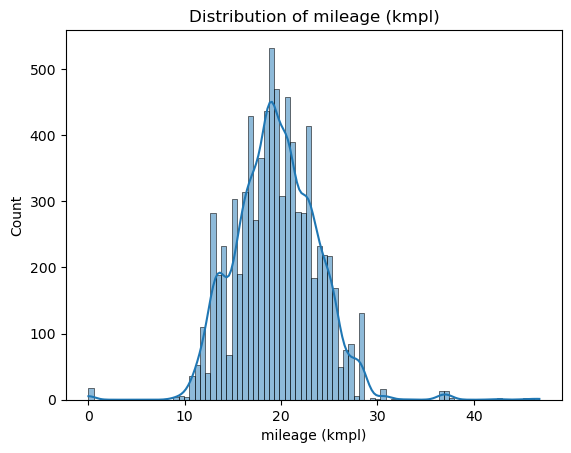

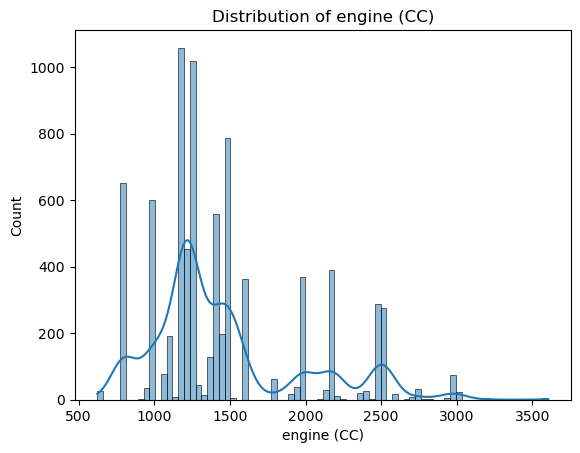

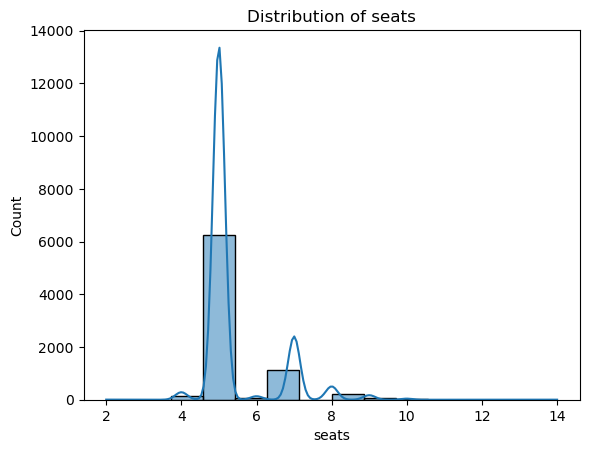

In [9]:
#plot the histogram of the numerical variable to study their distribution
sns.histplot(car['year'], kde=True) # create the histogram
plt.title('Distribution of year') # change the title
plt.show() # plot the histogram

sns.histplot(car['selling_price'], kde=True)
plt.title('Distribution of selling_price')
plt.show()

sns.histplot(car['km_driven'], kde=True)
plt.title('Distribution of km_driven')
plt.show()

sns.histplot(car['mileage (kmpl)'], kde=True)
plt.title('Distribution of mileage (kmpl)')
plt.show()

sns.histplot(car['engine (CC)'], kde=True)
plt.title('Distribution of engine (CC)')
plt.show()

sns.histplot(car['seats'], kde=True)
plt.title('Distribution of seats')
plt.show()

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


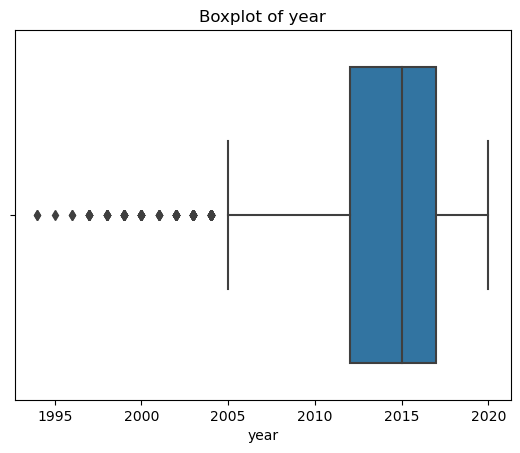

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


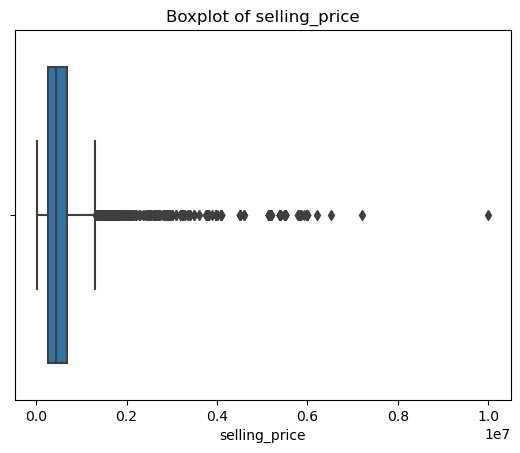

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


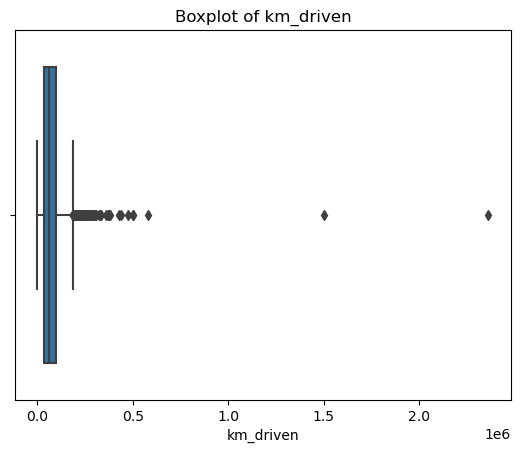

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


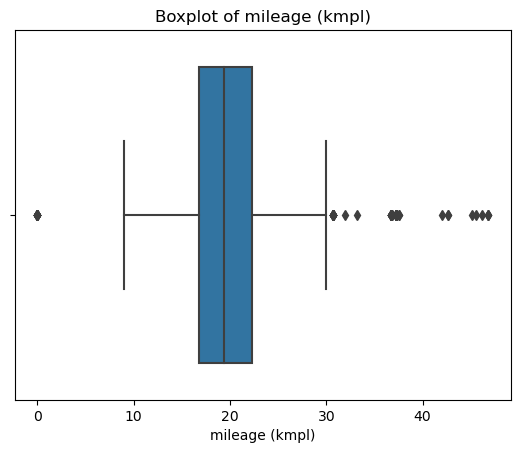

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


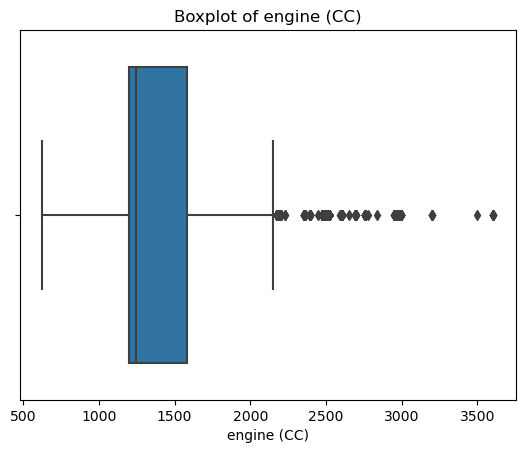

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


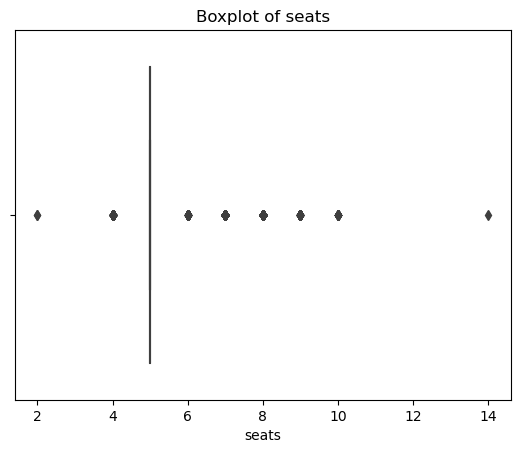

In [10]:
#now using the boxplot i am going to show the outliers
sns.boxplot(car['year'])#create the boxplot
plt.title('Boxplot of year')#change the title
plt.show()#show the boxplot

sns.boxplot(car['selling_price'])
plt.title('Boxplot of selling_price')
plt.show()

sns.boxplot(car['km_driven'])
plt.title('Boxplot of km_driven')
plt.show()

sns.boxplot(car['mileage (kmpl)'])
plt.title('Boxplot of mileage (kmpl)')
plt.show()

sns.boxplot(car['engine (CC)'])
plt.title('Boxplot of engine (CC)')
plt.show()

sns.boxplot(car['seats'])
plt.title('Boxplot of seats')
plt.show()

In [11]:
# let delete the outliers of km_driven to do it calculate the IQR using the first and third quartile and delete the data which are out of bounds 
# make by the IQR and quartile
Q1 = np.percentile(car["km_driven"], 25, interpolation="midpoint")#calculate first quartile
Q3 = np.percentile(car["km_driven"], 75, interpolation="midpoint")#calculate third quartile
IQR = Q3 - Q1#calculate IQR
upper_bound = car["km_driven"] >= (Q3 + 1.5 * IQR)#create the upper bound and search values which overpass the upperbound
lower_bound = car["km_driven"] <= (Q1 - 1.5 * IQR)
upper_points = np.where(upper_bound)#search the rows which overpass the upperbound
lower_points = np.where(lower_bound)
car.drop(car.index[upper_points[0]], axis = 0, inplace=True)
car.drop(car.index[lower_points[0]], axis = 0, inplace=True)# delete the rows
car

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage (kmpl)  \
0     Individual       Manual           First Owner           23.40   
1     Individual       Manual          Second Owner           21.14   
2     Individual       Manual           Third Owner           17.70   
3     Individual       Manual           First Owner           23.00   
4     Individual       Manual           First Owner           16.10   
...          ...          ...                   ...             ...   
8123  Individual       Manual           First Owner           18.50   
8124  Individual       Manual  Fourth & Above Owner           16.80   
8125  Individual       Manual           First Owner           19.30   
8126  Individual       Manual           First Owner           23.57   
8127  Individual       Manual           First Owner           23.57   

      engine (CC)  seats  
0            1248      5  
1            1498      5  
2            1497      5  
3            1396      5  
4            1298      5  
...           ...    ...  
8123         1197      5  
8124         1493      5  
8125         1248      5  
8126         1396      5  
8127         1396      5  

[7714 rows x 11 columns]

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of km_driven')

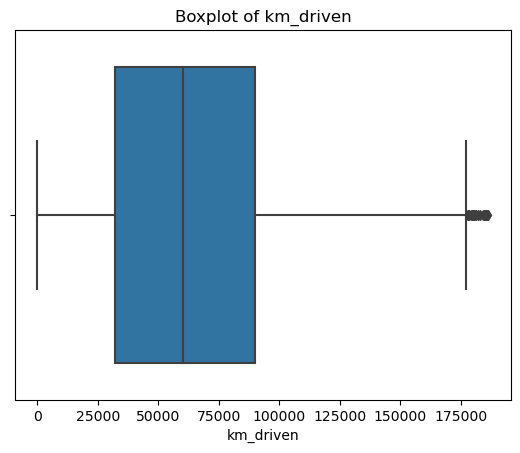

In [12]:
#plot again the boxplot of km_driven
sns.boxplot(car['km_driven'])
plt.title('Boxplot of km_driven')

In [13]:
''' 
In the boxplot we can see that some outliers have desappeared
'''

' \nIn the boxplot we can see that some outliers have desappeared\n'

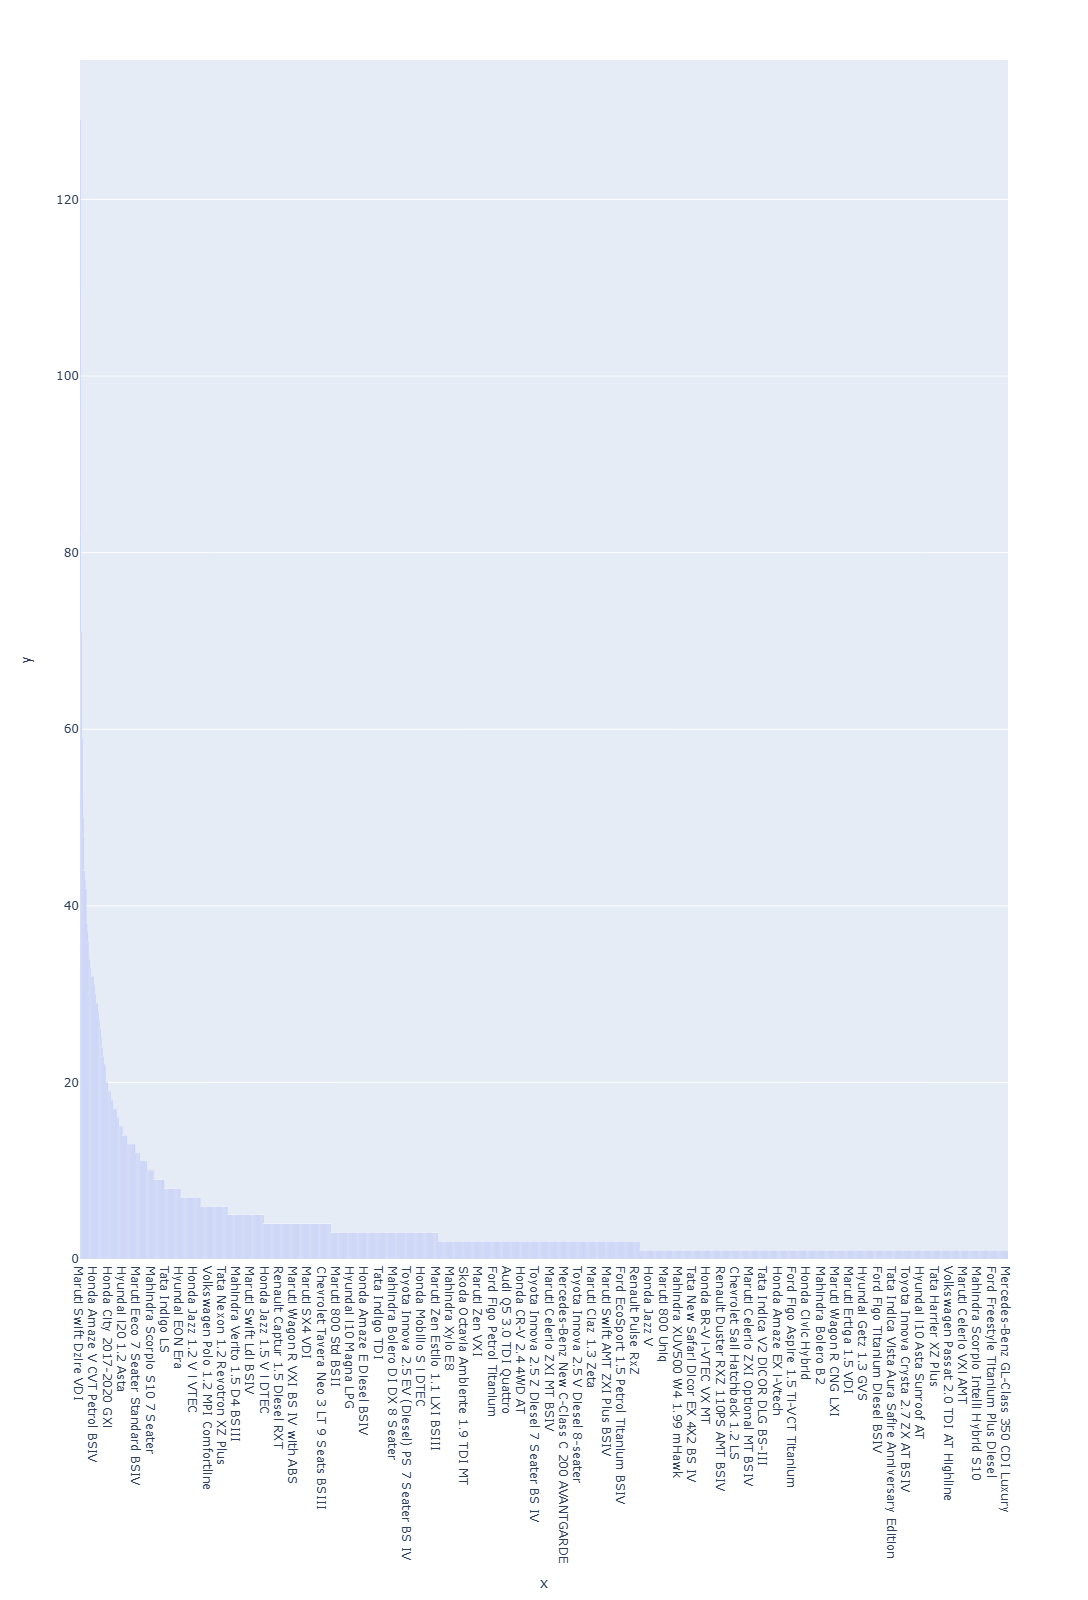

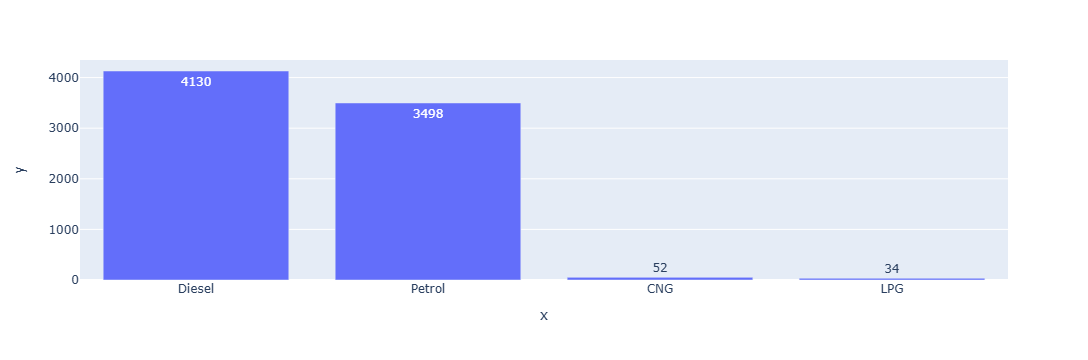

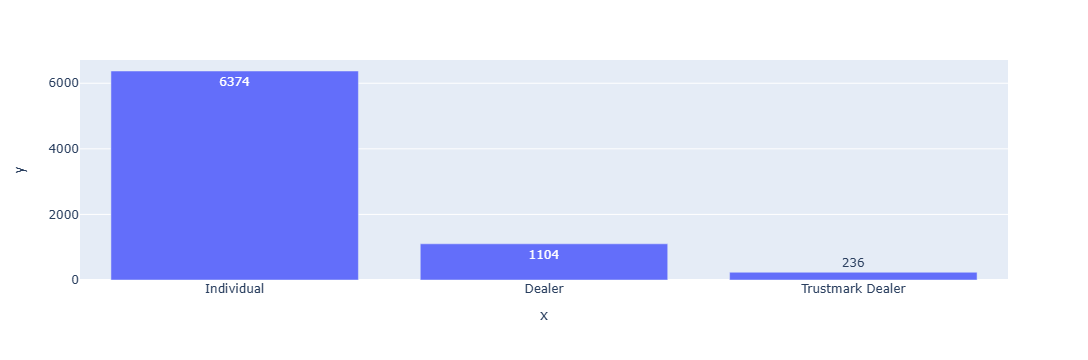

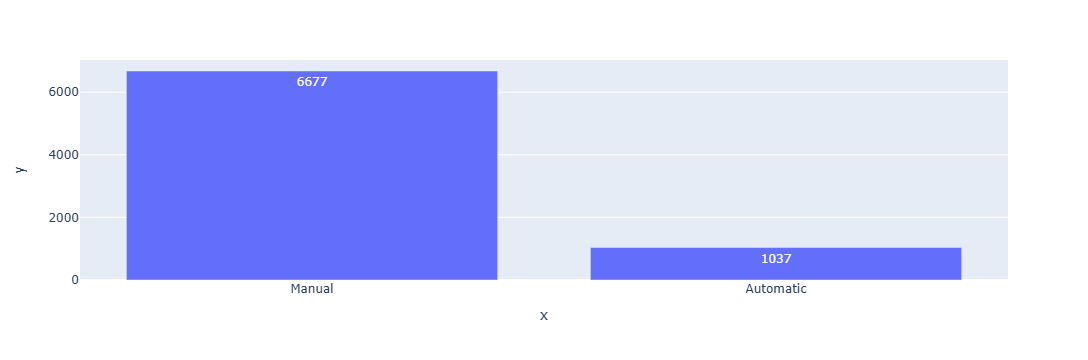

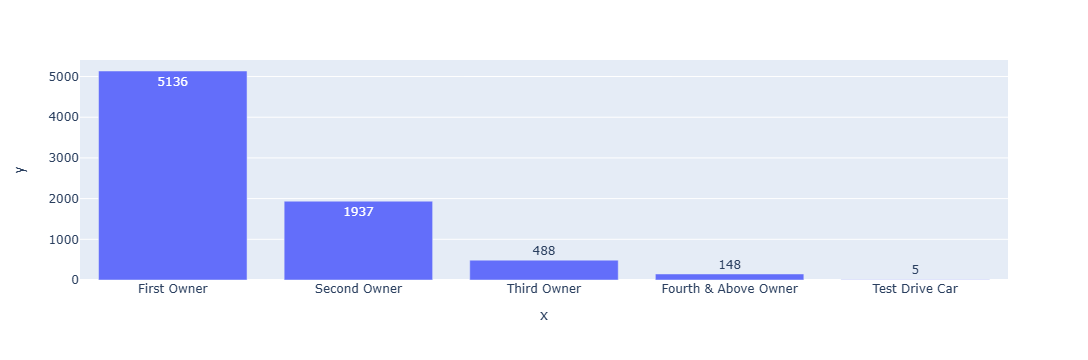

In [14]:
#now use the barplot to show the distribution of categorical variables 

cut_counts = car['name'].value_counts()# count the repetitions of each class

fig = px.bar(x=cut_counts.index, y=cut_counts.values, height=1600,  text_auto = True)# create the barplot to indicate the number of repetitiones of each class
fig.show()#show the barplot

cut_counts = car['fuel'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values, text_auto = True)
fig.show()

cut_counts = car['seller_type'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values, text_auto = True)
fig.show()

cut_counts = car['transmission'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values, text_auto = True)
fig.show()

cut_counts = car['owner'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values, text_auto = True)
fig.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_23872\2203560780.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



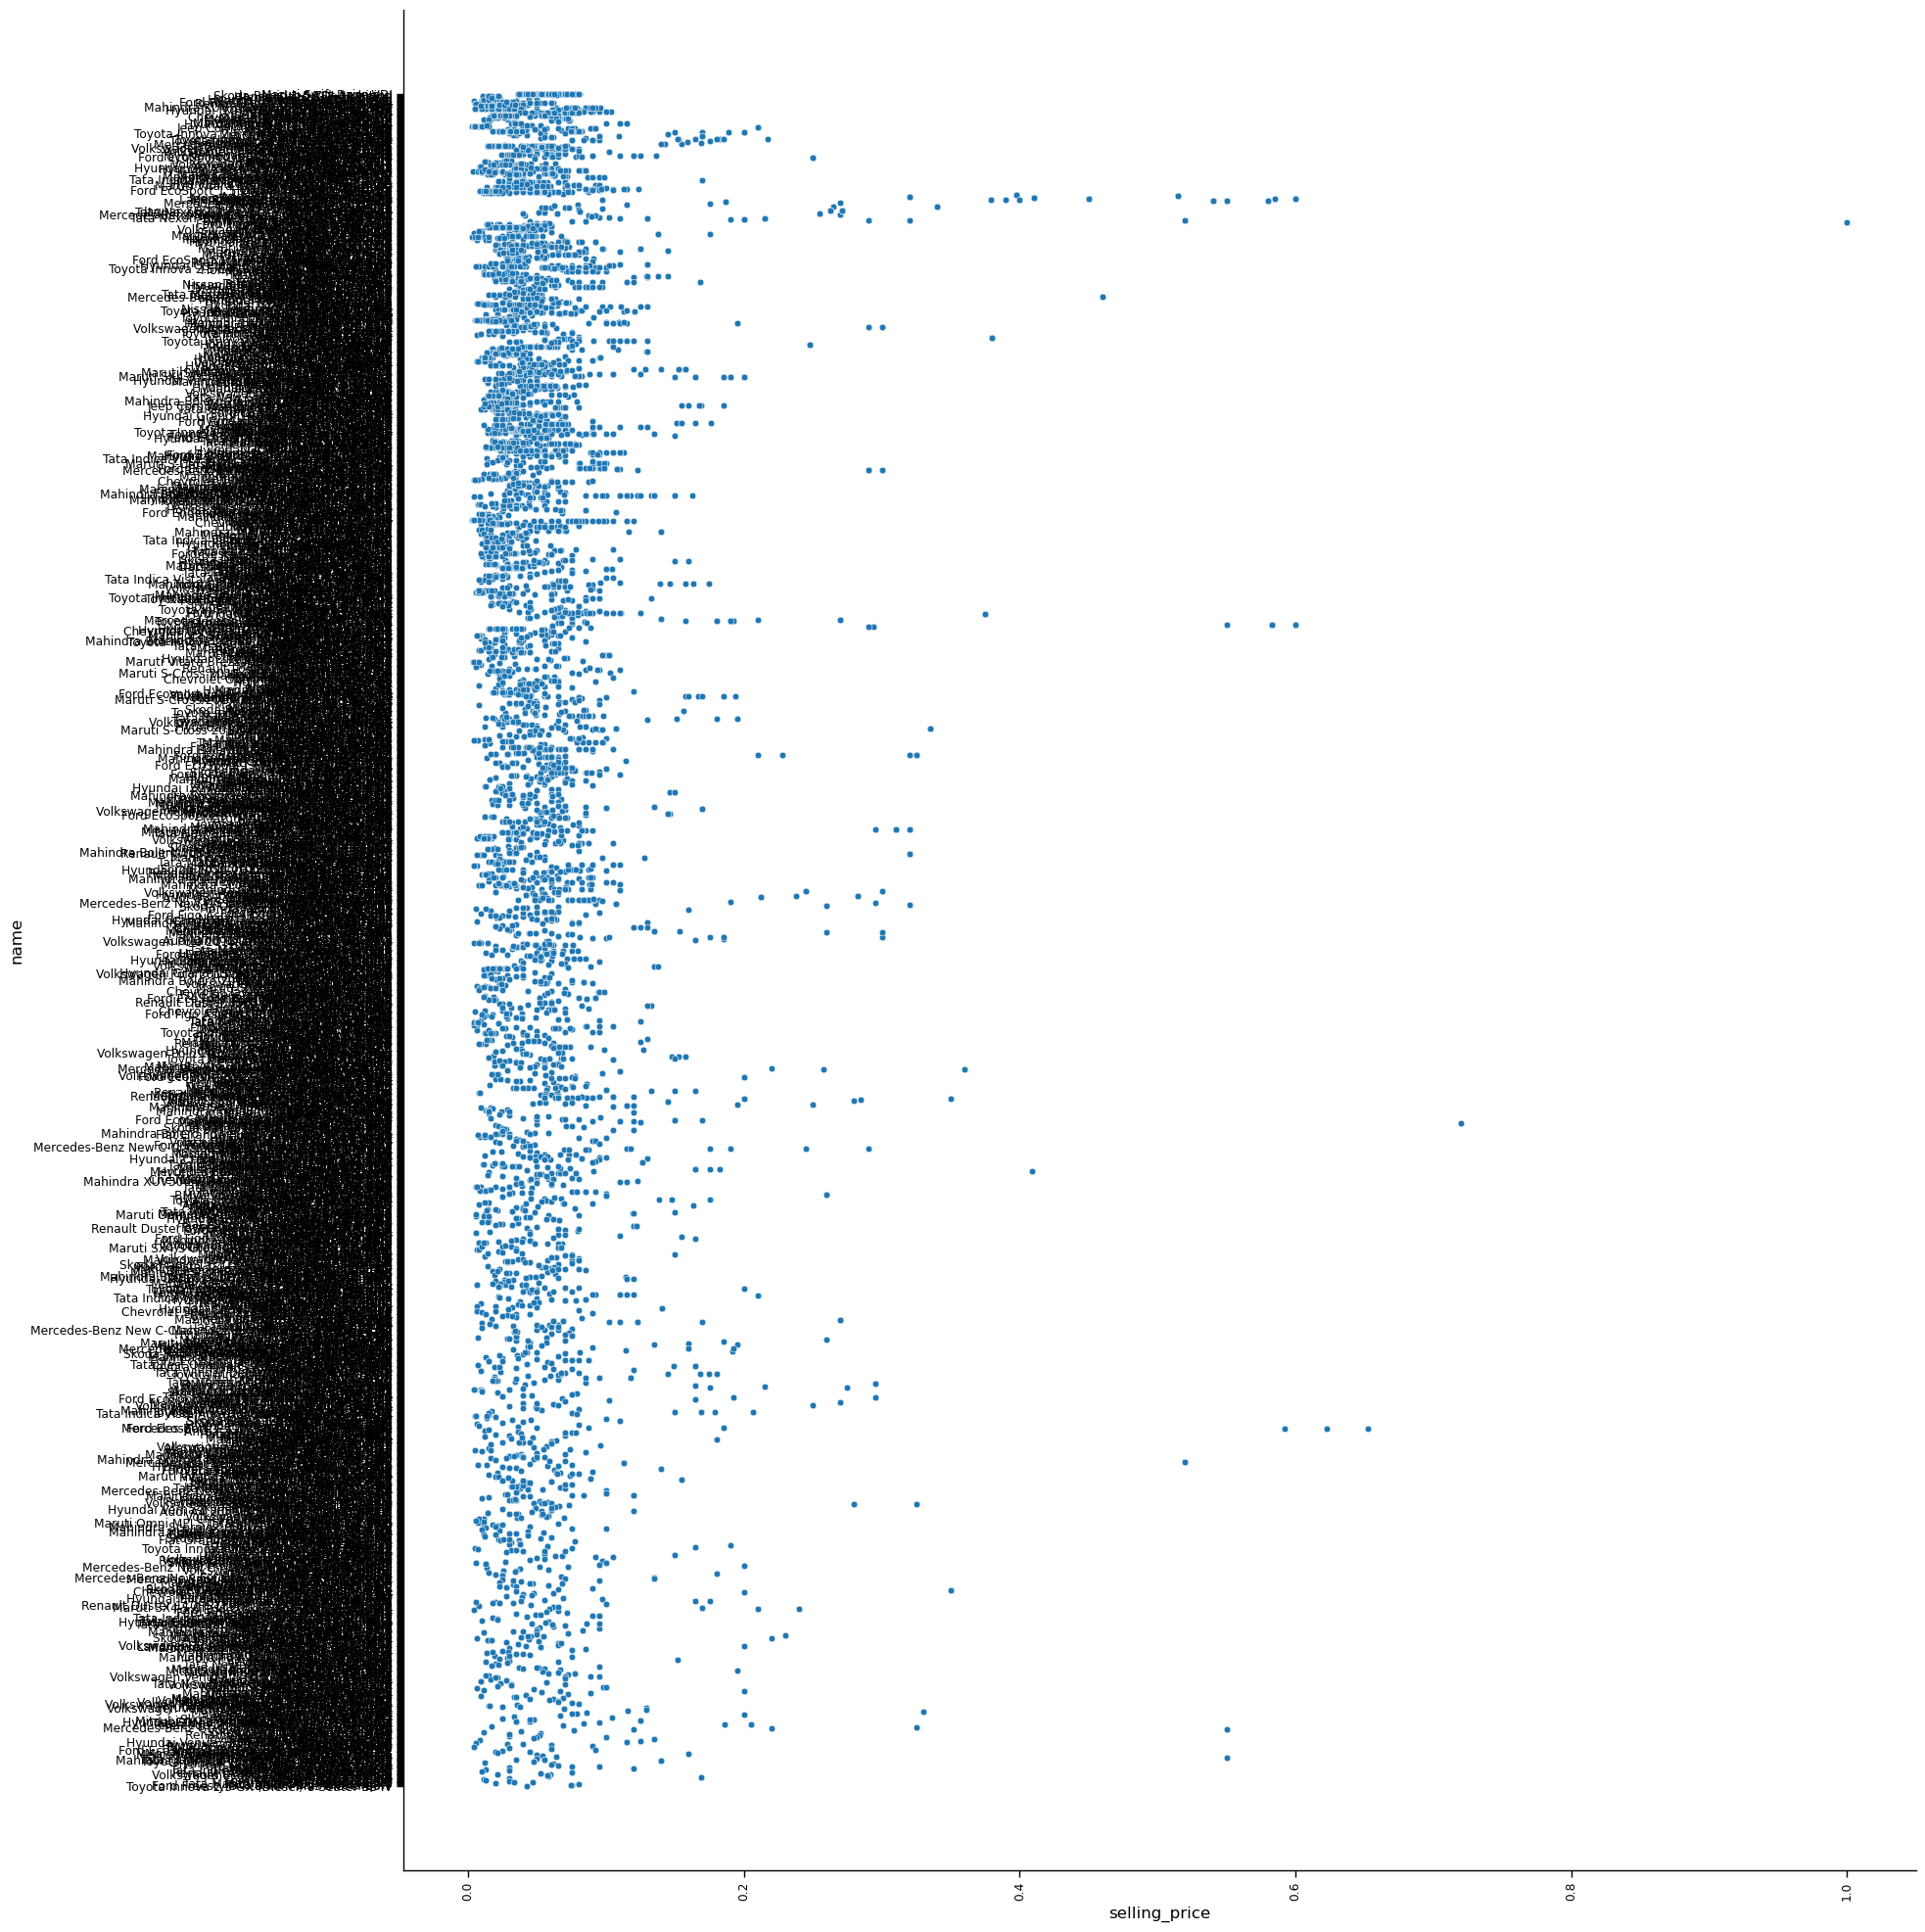

C:\Users\pablo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\pablo\AppData\Local\Temp\ipykernel_23872\2203560780.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



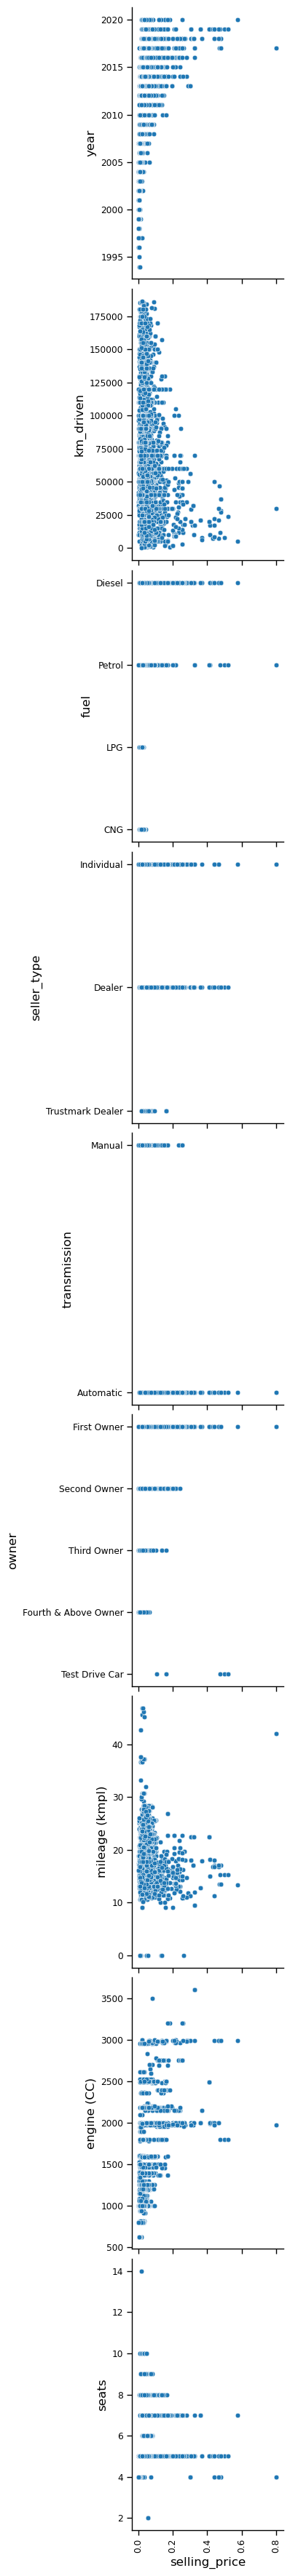

In [15]:
# use the pairplot to study the relation between selling_price and the rest of variables
sns.set_context("paper", rc={"axes.labelsize":12})#change the size of label
#create the pairplot
g = sns.pairplot(car, x_vars='selling_price', y_vars = 'name', height = 20)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

g = sns.pairplot(car, x_vars='selling_price', y_vars = 
                 ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage (kmpl)', 'engine (CC)', 'seats'], size = 4)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

In [16]:
# now I transform numerical data by normalization
def minmax_norm(df): 
    return (df - df.min()) / (df.max() - df.min()) #create a function to do the normalization

car['selling_price'] = minmax_norm(car['selling_price'])#use the function to normalize
car['engine (CC)'] = minmax_norm(car['engine (CC)'])
car['seats'] = minmax_norm(car['seats'])
car['mileage (kmpl)'] = minmax_norm(car['mileage (kmpl)'])
car['km_driven'] = minmax_norm(car['km_driven'])

# next I will tranform categorical features to numerical
label_encoder = LabelEncoder()
car['name'] = label_encoder.fit_transform(car['name'])
label_encoder = LabelEncoder()
car['fuel'] = label_encoder.fit_transform(car['fuel'])
label_encoder = LabelEncoder()
car['seller_type'] = label_encoder.fit_transform(car['seller_type'])
label_encoder = LabelEncoder()
car['owner'] = label_encoder.fit_transform(car['owner'])
label_encoder = LabelEncoder()
car['transmission'] = label_encoder.fit_transform(car['transmission'])

car

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     1233  2014       0.042126   0.780628     1            1             1   
1     1529  2014       0.034102   0.643816     1            1             1   
2      366  2006       0.012839   0.751120     3            1             1   
3      731  2010       0.019559   0.681373     1            1             1   
4     1274  2007       0.010030   0.643816     3            1             1   
...    ...   ...            ...        ...   ...          ...           ...   
8123   721  2013       0.029087   0.590165     3            1             1   
8124   607  2007       0.010532   0.638451     1            1             1   
8125  1245  2009       0.035306   0.643816     1            1             1   
8126  1615  2013       0.026078   0.134124     1            1             1   
8127  1615  2013       0.026078   0.134124     1            1             1   

      owner  mileage (kmpl)  engine (CC)  seats  
0         0        0.499829     0.209396   0.25  
1         2        0.451555     0.293289   0.25  
2         4        0.378076     0.292953   0.25  
3         0        0.491285     0.259060   0.25  
4         0        0.343900     0.226174   0.25  
...     ...             ...          ...    ...  
8123      0        0.395164     0.192282   0.25  
8124      1        0.358852     0.291611   0.25  
8125      0        0.412252     0.209396   0.25  
8126      0        0.503460     0.259060   0.25  
8127      0        0.503460     0.259060   0.25  

[7714 rows x 11 columns]

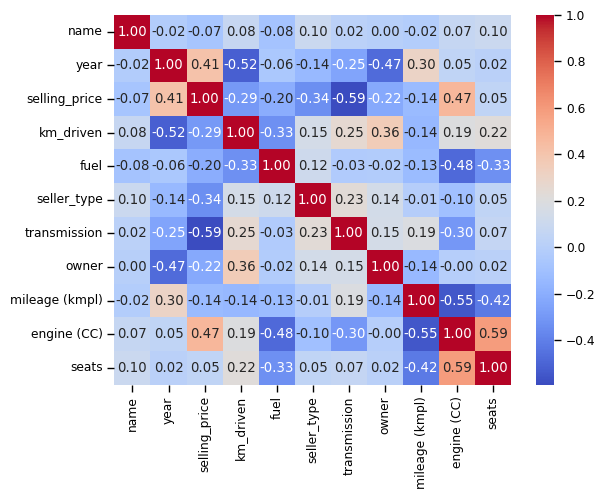

In [17]:
# I am going to see the correlation matrix between the variables
corrmat_new=car.corr()
sns.heatmap(corrmat_new, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
# I am going to split the dataset into training and testing sets
# first i separate the predictive variable Y and the predictors variables X
y= car['selling_price']
x = car.drop(['selling_price'], axis=1)
#create the training and testing sets using to create de testing set the 30% of data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=23)


In [19]:
#set that I will use a linear regression model to do the regression
modelo = linear_model.LinearRegression()
#train the model
modelo.fit(x_train,y_train)
# using the following line I can see the coeficients of the model (\beta)
print('Coefficients: \n', modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6], modelo.coef_[7], modelo.coef_[8], modelo.coef_[9])
# using the following line I can see the independent term of the model 
print('Independent term: \n', modelo.intercept_)

Coefficients: 
 -8.433622116863516e-06 0.0044667899576244785 -0.059214540071569316 -0.005473863575381991 -0.027309431460925057 -0.0773844801082756 -9.849422115395937e-05 0.01219398088834173 0.2382679971979011 -0.2097909714029847
Independent term: 
 -8.814890262931687


In [20]:
#now i am going to make predictions using the linear regression model
y_pred = modelo.predict(x_test)

In [21]:
# i am going to study the accuracy of the model using the MAE, MSE, R-squared
MAE = mean_absolute_error(y_test, y_pred)#calculate MAE
MSE = mean_squared_error(y_test, y_pred)#calculate MSE
R2 = r2_score(y_test, y_pred)#calculate R-squared
print('MAE value: ', MAE)
print('MSE value: ',MSE)
print('R-squared value: ',R2)

MAE value:  0.030039884601472024
MSE value:  0.0025988084230479424
R-squared value:  0.6023792532603309


In [22]:
'''
By the last measure we have that the model isn't bad but it could be better we can see it because the model explain the 60% of the variability
also the values of MAE and MSE are near 0. We can tell it is a good model
'''

"\nBy the last measure we have that the model isn't bad but it could be better we can see it because the model explain the 60% of the variability\nalso the values of MAE and MSE are near 0. We can tell it is a good model\n"

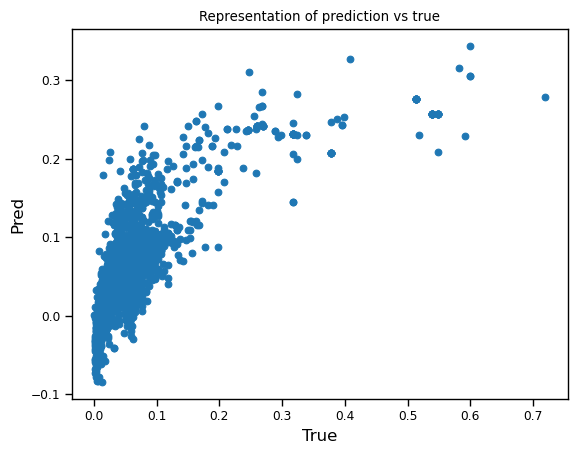

In [23]:
#plot the predicted values and the true values
plt.scatter(y_test, y_pred)
plt.title(u'Representation of prediction vs true')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()